In [17]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


# Understanding and visualizing the structure of our data 

1. Understanding all the data types we have 
2. Basic statistics about the data 
3. Visualizing the distributions of the data 
4. Looking for correlations in the data 
5. Experimenting with attribute combinations 

##

### Data types 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


### Basic statistics

In [9]:
non_id_columns = [col for col in train.columns if not col.endswith('id')]
train[non_id_columns].describe()


['seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target']


,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target
count,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06
mean,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02
std,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02
25%,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00
50%,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02
75%,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00
max,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02


### Visualizing the distributions of the data 

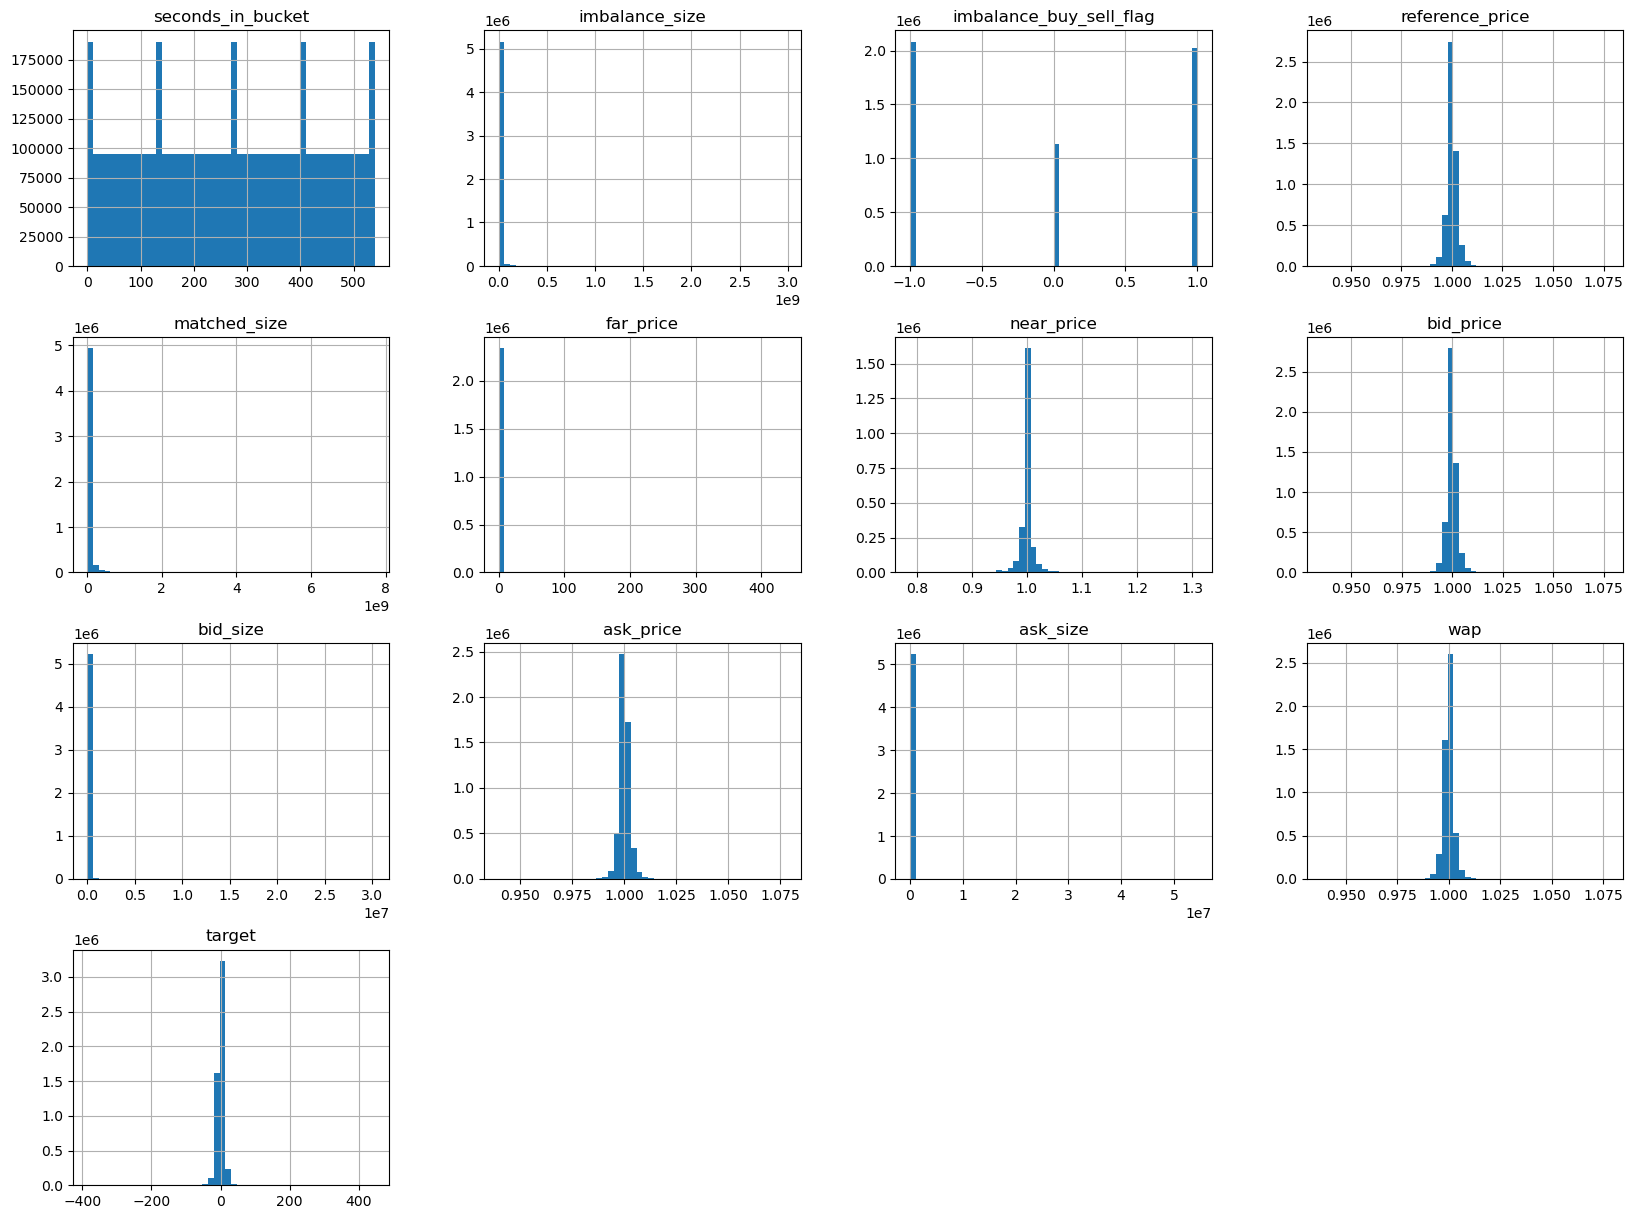

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
train[non_id_columns].hist(bins=50, figsize=(20,15))
plt.show()

### Looking for correlations in the data 

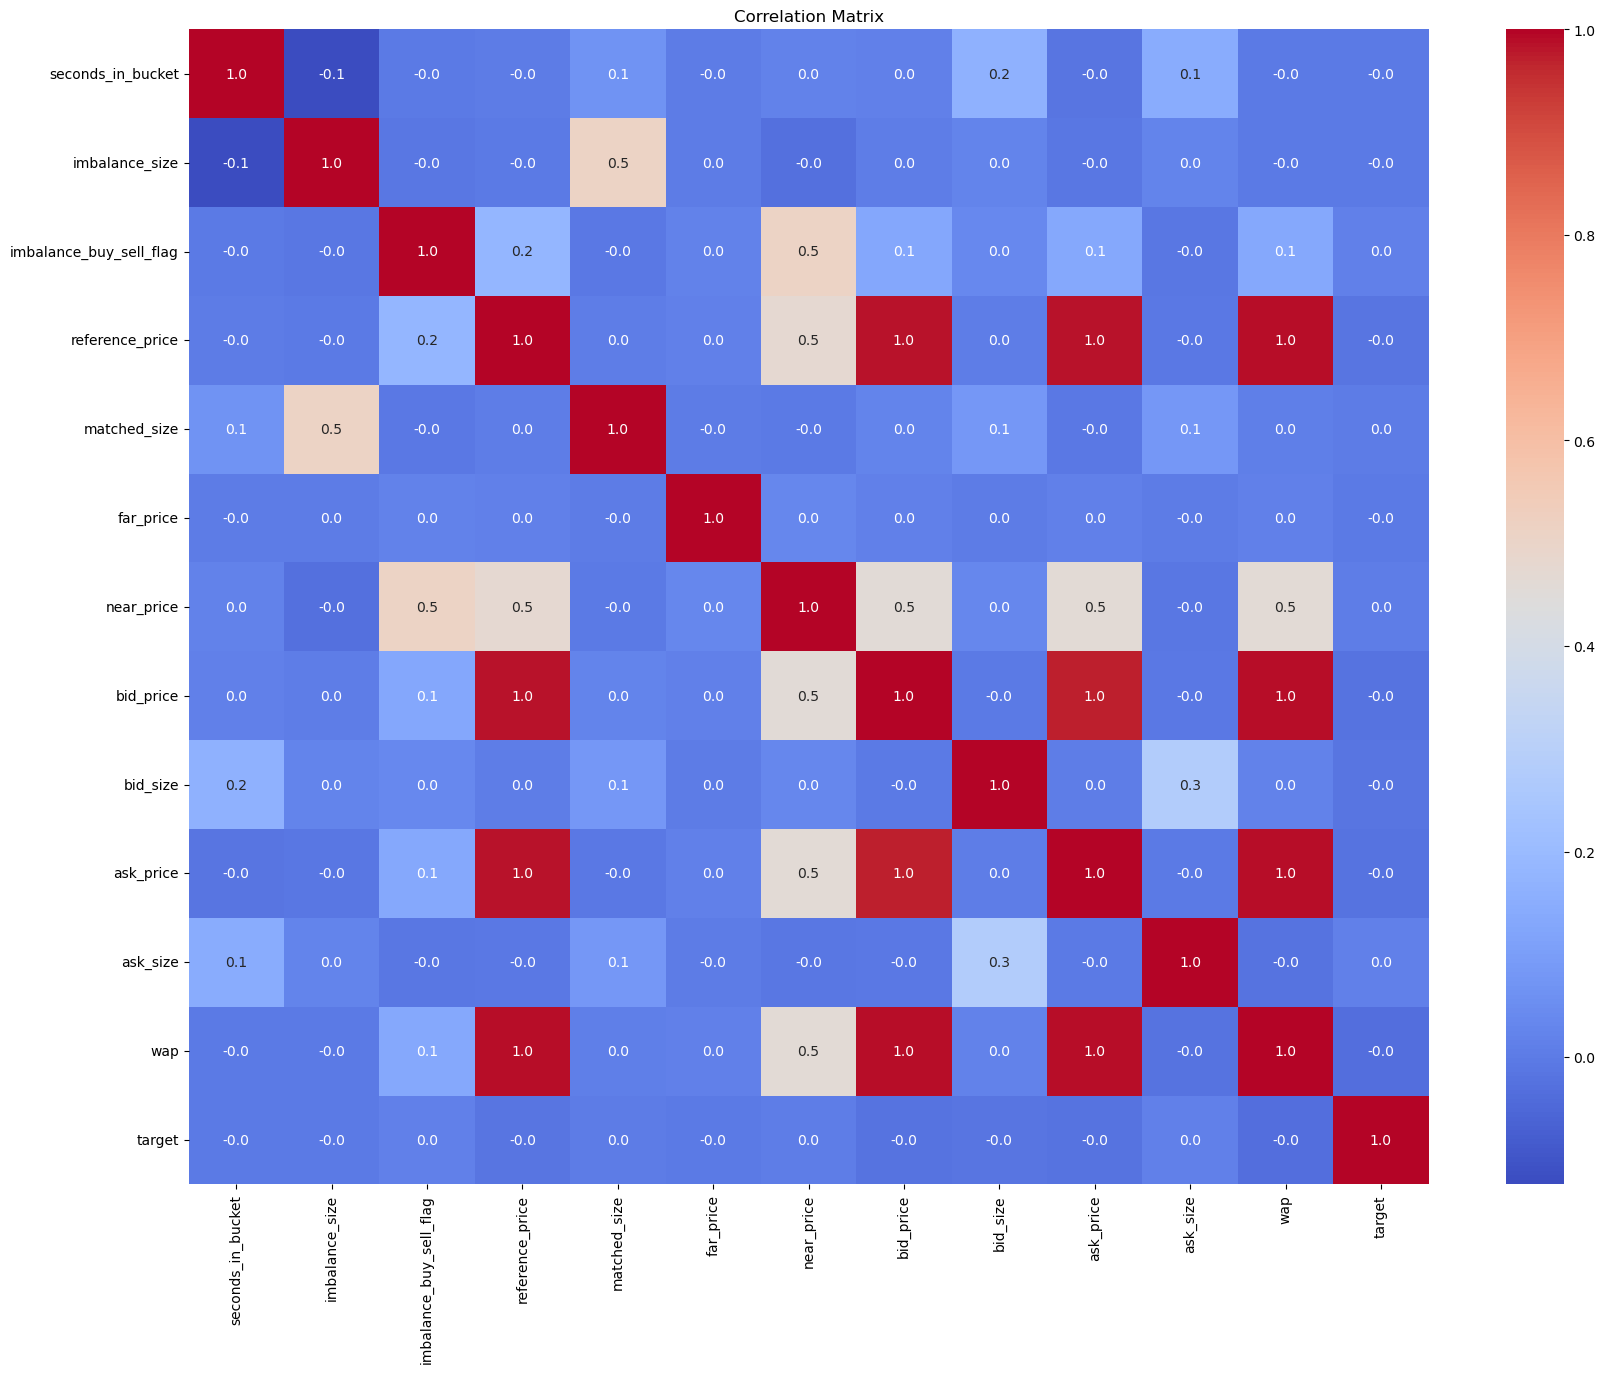

In [19]:
%matplotlib inline
corr_matrix = train[non_id_columns].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix')
plt.show()



In [15]:
corr_matrix['target'].sort_values(ascending=False)

target                     1.000000
imbalance_buy_sell_flag    0.015102
ask_size                   0.014936
near_price                 0.006045
matched_size               0.000197
imbalance_size            -0.001190
far_price                 -0.001804
seconds_in_bucket         -0.002203
reference_price           -0.017394
bid_size                  -0.018000
ask_price                 -0.021674
bid_price                 -0.022326
wap                       -0.035165
Name: target, dtype: float64

### Experimenting with different interation variables

In [23]:
train['imbalance_flagxsize'] = train['imbalance_buy_sell_flag']*train['imbalance_buy_sell_flag']
corr_matrix = train.corr()
corr_matrix['target']['imbalance_flagxsize']

0.0008405704603015469

# Cleaning the data
1. Handling null values
2. Feature scaling 

### Handling null values

In [25]:
# #how many columns have missing values
# count_null_rows = train.isnull().any().sum(axis=0)
# total_rows = train.shape[0]

# ratio = count_null_rows/total_rows
# print(ratio)
# if ratio < 0.05:
#     train.dropna(inplace=True)
# else:
#     for col in train.columns:
#         median = train[col].median()
#         train[col].fillna(median, inplace=True)


1.7182196190134365e-06


### Feature scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


data_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                          ('std_scaler', StandardScaler())])




# Test set selection

If your data is not large enough then you would want to be careful about how you sample for the test set. If our test set is incorrectly samples that leads to issues when you're training your model as it's easy to introduce a sample selection bias (probabilistically). If you see below we have around 2 million different data points, so it's say to say that we can run with a regular test set selection as we need.

In [27]:
train.shape[0]

2343638

In [31]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train, test_size=0.2, random_state=42)

# Evaluating several models on this data for our own understanding.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_absolute_error

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(train_df.drop(['target'], axis=1), train_df['target'])
target_predictions = lin_reg.predict(test_df.drop(['target'], axis=1))
lin_mae = mean_absolute_error(test_df['target'], target_predictions)
lin_mae

5.655026217699579

In [33]:

# Create an instance of the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Fit the model on the training data
tree_reg.fit(train_df.drop(['target'], axis=1), train_df['target'])

# Make predictions on the test data
tree_predictions = tree_reg.predict(test_df.drop(['target'], axis=1))

# Calculate the mean absolute error
tree_mae = mean_absolute_error(test_df['target'], tree_predictions)
tree_mae


7.388192302786336

In [34]:
random_forrest_reg = RandomForestRegressor()
random_forrest_reg.fit(train_df.drop(['target'], axis=1), train_df['target'])
random_forrest_predictions = random_forrest_reg.predict(test_df.drop(['target'], axis=1))
random_forrest_mae = mean_absolute_error(test_df['target'], random_forrest_predictions)
random_forrest_mae

5.080484048640526

In [ ]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:mae')
xgb_reg.fit(train_df.drop(['target'], axis=1), train_df['target'])
xgb_predictions = xgb_reg.predict(test_df.drop(['target'], axis=1))
xgb_mae = mean_absolute_error(test_df['target'], xgb_predictions)

xgb_mae

In [ ]:
import optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

In [ ]:
for (test, revealed_targets, sample_prediction) in iter_test:
    sample_prediction['target'] = lin_reg.predict(test)
    env.predict(sample_prediction)